# A Simple Neural Network using PyTorch

This notebook demonstrates how to create a simple feedforward neural network using PyTorch. We'll use a basic dataset, train the model, and evaluate its performance.

## 1. Import Required Libraries

Import PyTorch and other necessary libraries such as NumPy and Matplotlib.

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Define the Dataset

We'll use a synthetic dataset generated by `sklearn.datasets.make_moons`. The dataset will be split into training and testing sets.


1. **`TensorDataset`**:
   - Combines the features (`X_train_tensor`) and labels (`y_train_tensor`) into a single dataset object.
   - This allows PyTorch to treat the features and labels as paired data for training.

2. **`DataLoader`**:
   - The `DataLoader` is used to load the dataset in **mini-batches** during training.
   - It provides an efficient way to iterate over the dataset in chunks (batches) instead of loading the entire dataset into memory at once.


In [2]:
# Generate a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## 3. Build the Neural Network

Define a simple feedforward neural network using PyTorch's `nn.Module`.

In [3]:
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 16
output_size = 2
model = SimpleNN(input_size, hidden_size, output_size)

## 4. Train the Neural Network

Train the model using a loss function (e.g., CrossEntropyLoss) and an optimizer (e.g., SGD or Adam).

In [4]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print loss for the epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/50, Loss: 0.5783
Epoch 2/50, Loss: 0.4481
Epoch 3/50, Loss: 0.4355
Epoch 4/50, Loss: 0.4317
Epoch 5/50, Loss: 0.4280
Epoch 6/50, Loss: 0.4234
Epoch 7/50, Loss: 0.4176
Epoch 8/50, Loss: 0.4101
Epoch 9/50, Loss: 0.4010
Epoch 10/50, Loss: 0.3908
Epoch 11/50, Loss: 0.3825
Epoch 12/50, Loss: 0.3757
Epoch 13/50, Loss: 0.3683
Epoch 14/50, Loss: 0.3648
Epoch 15/50, Loss: 0.3611
Epoch 16/50, Loss: 0.3582
Epoch 17/50, Loss: 0.3576
Epoch 18/50, Loss: 0.3560
Epoch 19/50, Loss: 0.3535
Epoch 20/50, Loss: 0.3530
Epoch 21/50, Loss: 0.3518
Epoch 22/50, Loss: 0.3508
Epoch 23/50, Loss: 0.3500
Epoch 24/50, Loss: 0.3491
Epoch 25/50, Loss: 0.3482
Epoch 26/50, Loss: 0.3491
Epoch 27/50, Loss: 0.3484
Epoch 28/50, Loss: 0.3468
Epoch 29/50, Loss: 0.3469
Epoch 30/50, Loss: 0.3463
Epoch 31/50, Loss: 0.3461
Epoch 32/50, Loss: 0.3471
Epoch 33/50, Loss: 0.3461
Epoch 34/50, Loss: 0.3456
Epoch 35/50, Loss: 0.3452
Epoch 36/50, Loss: 0.3454
Epoch 37/50, Loss: 0.3459
Epoch 38/50, Loss: 0.3454
Epoch 39/50, Loss: 0.

## 5. Evaluate the Neural Network

Evaluate the model on the test set and visualize the results, such as accuracy or a confusion matrix.

Test Accuracy: 0.9750


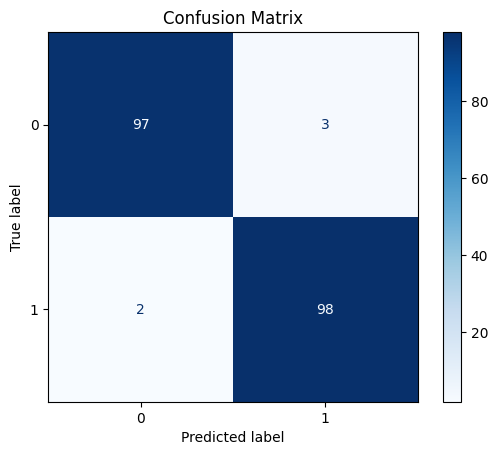

In [5]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, axis=1)
    accuracy = (y_pred_classes == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()